# **Assignment 5: Detectors and characteristic descriptors**

By Ana María Garzón

Computer Vision, Universidad del Rosario

April 2023

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

Importing images

In [2]:
img1 = cv2.imread('Image_1.png')
img2 = cv2.imread('Image_2.png')
img3 = cv2.imread('Image_3.png')

**1. [50%] Feature Detectors**

* Perform feature acquisition (points of interest) using Harris corner detector on image 1, 2 and 3, perform RGB visualization of the features (points of interest) found before and after the reduction stage features (points of interest) with Non-maximum Suppression

Load images in RGB and Grayscale

In [3]:
# Imagenes en RGB
img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3_rgb = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

# Imagenes en gris
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img3_gray = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

Viewing images in RGB

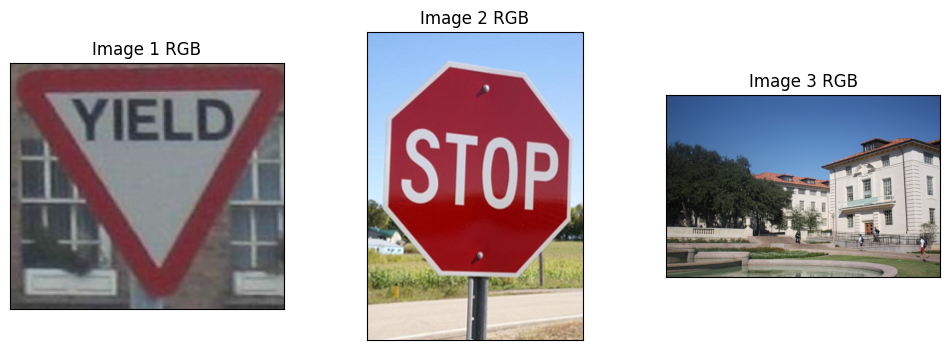

In [4]:
plt.figure(figsize=(12,4))

plt.subplot(131)
plt.title('Image 1 RGB')
plt.imshow(img1_rgb)
plt.xticks([]), plt.yticks([])

plt.subplot(132)
plt.title('Image 2 RGB')
plt.imshow(img2_rgb)
plt.xticks([]), plt.yticks([])

plt.subplot(133)
plt.title('Image 3 RGB')
plt.imshow(img3_rgb)
plt.xticks([]), plt.yticks([])

plt.show()

Now we will create a corner map for the images using the Harris corner detector.

In [5]:
img1_corner = cv2.cornerHarris(img1_gray, 2, 3, 0.04) # tamaño ventana, tamaño Sobel, k
img2_corner = cv2.cornerHarris(img2_gray, 2, 3, 0.04) # tamaño ventana, tamaño Sobel, k
img3_corner = cv2.cornerHarris(img3_gray, 2, 3, 0.04) # tamaño ventana, tamaño Sobel, k

Determine candidates for points of interest

In [6]:
T = 0.01 # umbral T
T1 = T*img1_corner.max() # umbral T en terminos de ME
[_, img1_corner_norm] = cv2.threshold(img1_corner, T1, 1, cv2.THRESH_BINARY) # normalización [0-1]
img1_corner_norm = np.uint8(img1_corner_norm)

T2 = T*img2_corner.max() # umbral T en terminos de ME
[_, img2_corner_norm] = cv2.threshold(img2_corner, T2, 1, cv2.THRESH_BINARY) # normalización [0-1]
img2_corner_norm = np.uint8(img2_corner_norm)

T3 = T*img3_corner.max() # umbral T en terminos de ME
[_, img3_corner_norm] = cv2.threshold(img3_corner, T3, 1, cv2.THRESH_BINARY) # normalización [0-1]
img3_corner_norm = np.uint8(img3_corner_norm)

[_,_,_, centroids1] = cv2.connectedComponentsWithStats(img1_corner_norm) # encontrar centroides gradientes
[_,_,_, centroids2] = cv2.connectedComponentsWithStats(img2_corner_norm) # encontrar centroides gradientes
[_,_,_, centroids3] = cv2.connectedComponentsWithStats(img3_corner_norm) # encontrar centroides gradientes

[interest_points1,_] = centroids1.shape # puntos de interés
[interest_points2,_] = centroids2.shape # puntos de interés
[interest_points3,_] = centroids3.shape # puntos de interés

print("Point of interest candidates image 1:", interest_points1)
print("Point of interest candidates image 2:", interest_points2)
print("Point of interest candidates image 3:", interest_points3)

Point of interest candidates image 1: 234
Point of interest candidates image 2: 138
Point of interest candidates image 3: 2206


View points of interest before Non Maximum Suppression

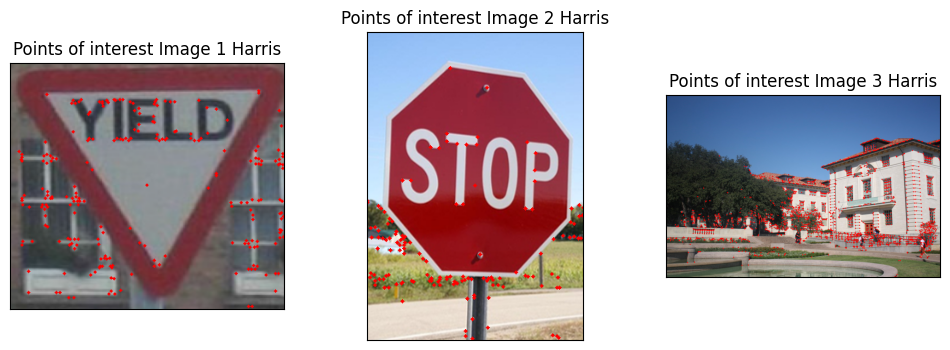

In [7]:
img1_rgb_copy1 = np.copy(img1_rgb)
img2_rgb_copy1 = np.copy(img2_rgb)
img3_rgb_copy1 = np.copy(img3_rgb)

corners1 = np.int64(centroids1) # flotante a entero
corners2 = np.int64(centroids2) # flotante a entero
corners3 = np.int64(centroids3) # flotante a entero

for i in corners1:
  x, y = i.ravel() # matriz flat
  cv2.circle(img1_rgb_copy1,(x,y),2,255,-1) # visualiza los puntos de interés

for i in corners2:
  x, y = i.ravel() # matriz flat
  cv2.circle(img2_rgb_copy1,(x,y),2,255,-1) # visualiza los puntos de interés

for i in corners3:
  x, y = i.ravel() # matriz flat
  cv2.circle(img3_rgb_copy1,(x,y),2,255,-1) # visualiza los puntos de interés

plt.figure(figsize=(12,4))

plt.subplot(131)
plt.title('Points of interest Image 1 Harris')
plt.imshow(img1_rgb_copy1)
plt.xticks([]), plt.yticks([])

plt.subplot(132)
plt.title('Points of interest Image 2 Harris')
plt.imshow(img2_rgb_copy1)
plt.xticks([]), plt.yticks([])

plt.subplot(133)
plt.title('Points of interest Image 3 Harris')
plt.imshow(img3_rgb_copy1)
plt.xticks([]), plt.yticks([])

plt.show()

Eliminate multiple responses (Non-maximum Suppression)

In [8]:
img1_corner_norm = cv2.dilate(img1_corner_norm,None) # dilatar cuadrado 3x3, unir puntos de interés cercanos
[_,_,_, centroids1] = cv2.connectedComponentsWithStats(img1_corner_norm) # encontrar centroides gradientes

img2_corner_norm = cv2.dilate(img2_corner_norm,None) # dilatar cuadrado 3x3, unir puntos de interés cercanos
[_,_,_, centroids2] = cv2.connectedComponentsWithStats(img2_corner_norm) # encontrar centroides gradientes

img3_corner_norm = cv2.dilate(img3_corner_norm,None) # dilatar cuadrado 3x3, unir puntos de interés cercanos
[_,_,_, centroids3] = cv2.connectedComponentsWithStats(img3_corner_norm) # encontrar centroides gradientes

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001) # criterio de parada
corners1 = cv2.cornerSubPix(img1_corner_norm, np.float32(centroids1), (5,5), (-1,-1), criteria) # Non-maximum Suppression
corners2 = cv2.cornerSubPix(img2_corner_norm, np.float32(centroids2), (5,5), (-1,-1), criteria) # Non-maximum Suppression
corners3 = cv2.cornerSubPix(img3_corner_norm, np.float32(centroids3), (5,5), (-1,-1), criteria) # Non-maximum Suppression

[interest_points1, _] = corners1.shape # puntos de interés
[interest_points2, _] = corners2.shape # puntos de interés
[interest_points3, _] = corners3.shape # puntos de interés

print("Point of interest image 1:", interest_points1)
print("Point of interest image 2:", interest_points2)
print("Point of interest image 3:", interest_points3)


Point of interest image 1: 138
Point of interest image 2: 86
Point of interest image 3: 840


View points of interest

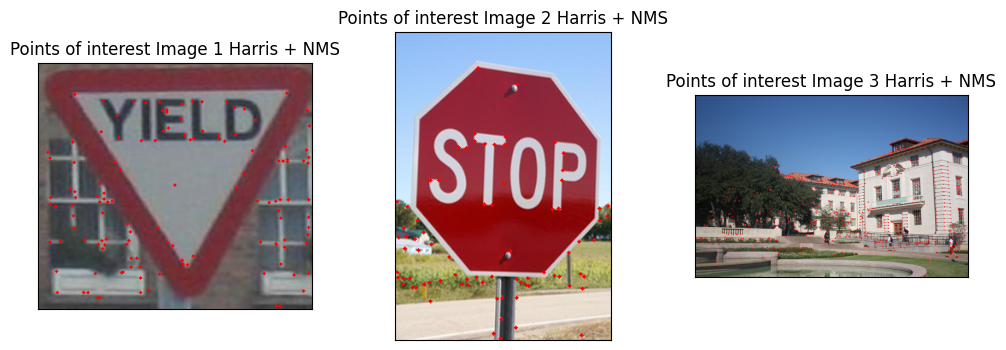

In [9]:
img1_rgb_copy2 = np.copy(img1_rgb)
img2_rgb_copy2 = np.copy(img2_rgb)
img3_rgb_copy2 = np.copy(img3_rgb)

corners1 = np.int64(corners1) # flotante a entero
corners2 = np.int64(corners2) # flotante a entero
corners3 = np.int64(corners3) # flotante a entero

for i in corners1:
  x, y = i.ravel() # matriz flat
  cv2.circle(img1_rgb_copy2,(x,y),2,255,-1) # visualiza los puntos de interés

for i in corners2:
  x, y = i.ravel() # matriz flat
  cv2.circle(img2_rgb_copy2,(x,y),2,255,-1) # visualiza los puntos de interés

for i in corners3:
  x, y = i.ravel() # matriz flat
  cv2.circle(img3_rgb_copy2,(x,y),2,255,-1) # visualiza los puntos de interés


plt.figure(figsize=(12,4))

plt.subplot(131)
plt.title('Points of interest Image 1 Harris + NMS')
plt.imshow(img1_rgb_copy2)
plt.xticks([]), plt.yticks([])

plt.subplot(132)
plt.title('Points of interest Image 2 Harris + NMS')
plt.imshow(img2_rgb_copy2)
plt.xticks([]), plt.yticks([])

plt.subplot(133)
plt.title('Points of interest Image 3 Harris + NMS')
plt.imshow(img3_rgb_copy2)
plt.xticks([]), plt.yticks([])

plt.show()

* Perform feature acquisition (points of interest) using the Shi-Tomasi corner detector in image 1, 2 and 3, perform RGB visualization of the features (points of interest) found. Display in RGB a maximum of 100 features (points of interest) for image 1 and 2, and a maximum of 1000 features (points of interest) for image 3.

Create corner map


In [10]:
corners1_ST = cv2.goodFeaturesToTrack(img1_gray,100,0.04, 10)
corners2_ST = cv2.goodFeaturesToTrack(img2_gray,100,0.04, 10)
corners3_ST = cv2.goodFeaturesToTrack(img3_gray,1000,0.04, 10)

Determine candidates for points of interest

In [11]:
[interest_points1_ST, _, _] = corners1_ST.shape # puntos de interés
[interest_points2_ST, _, _] = corners2_ST.shape # puntos de interés
[interest_points3_ST, _, _] = corners3_ST.shape # puntos de interés
print("Points of interest candidates Image 1:", interest_points1_ST)
print("Points of interest candidates Image 2:", interest_points2_ST)
print("Points of interest candidates Image 3:", interest_points3_ST)


Points of interest candidates Image 1: 100
Points of interest candidates Image 2: 100
Points of interest candidates Image 3: 1000


View points of interest

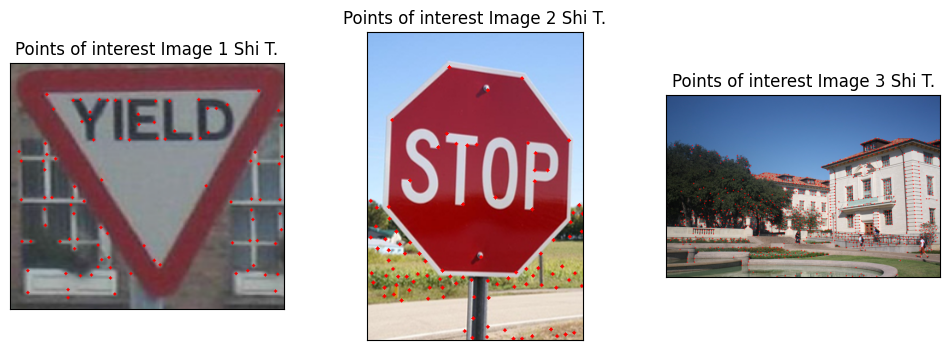

In [12]:
img1_rgb_copy3 = np.copy(img1_rgb)
img2_rgb_copy3 = np.copy(img2_rgb)
img3_rgb_copy3 = np.copy(img3_rgb)

corners1 = np.int64(corners1_ST) # flotante a entero
corners2 = np.int64(corners2_ST) # flotante a entero
corners3 = np.int64(corners3_ST) # flotante a entero

for i in corners1:
  x, y = i.ravel() # matriz flat
  cv2.circle(img1_rgb_copy3,(x,y),2,255,-1) # visualiza los puntos de interés

for i in corners2:
  x, y = i.ravel() # matriz flat
  cv2.circle(img2_rgb_copy3,(x,y),2,255,-1) # visualiza los puntos de interés

for i in corners3:
  x, y = i.ravel() # matriz flat
  cv2.circle(img3_rgb_copy3,(x,y),2,255,-1) # visualiza los puntos de interés

plt.figure(figsize=(12,4))

plt.subplot(131)
plt.title('Points of interest Image 1 Shi T.')
plt.imshow(img1_rgb_copy3)
plt.xticks([]), plt.yticks([])

plt.subplot(132)
plt.title('Points of interest Image 2 Shi T.')
plt.imshow(img2_rgb_copy3)
plt.xticks([]), plt.yticks([])

plt.subplot(133)
plt.title('Points of interest Image 3 Shi T.')
plt.imshow(img3_rgb_copy3)
plt.xticks([]), plt.yticks([])

plt.show()

* Perform feature acquisition (points of interest) using FAST on image 1, 2 and 3, perform RGB visualization of the features (points of interest) found. Display in RGB a maximum of 100 features (points of interest) for image 1 and 2, and a maximum of 1000 features (points of interest) for image 3.



In [13]:
fast = cv2.FastFeatureDetector_create() # crear objeto FAST
fast.setThreshold(19)
keypoints1_fast = fast.detect(img1_rgb,None)
fast.setThreshold(48)
keypoints2_fast = fast.detect(img2_rgb,None)
fast.setThreshold(59)
keypoints3_fast = fast.detect(img3_rgb,None)

print("puntos de interés imagen 1:", format(len(keypoints1_fast)))
print("puntos de interés imagen 2:", format(len(keypoints2_fast)))
print("puntos de interés imagen 3:", format(len(keypoints3_fast)))

puntos de interés imagen 1: 93
puntos de interés imagen 2: 97
puntos de interés imagen 3: 980


View points of interest

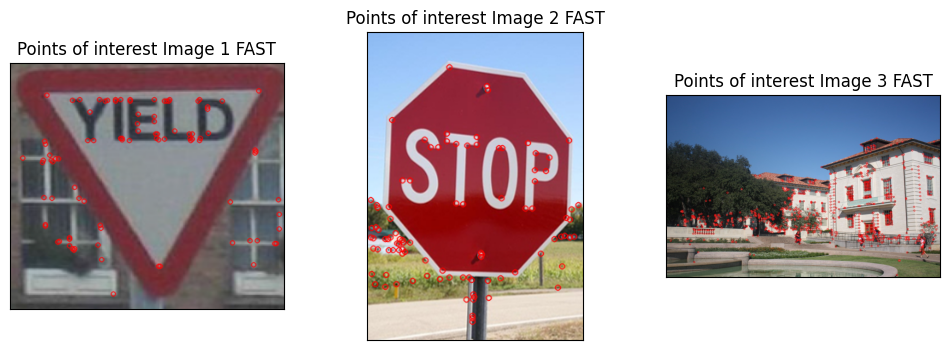

In [14]:
img1_fast = cv2.drawKeypoints(img1_rgb, keypoints1_fast, None, color=(255,0,0))
img2_fast = cv2.drawKeypoints(img2_rgb, keypoints2_fast, None, color=(255,0,0))
img3_fast = cv2.drawKeypoints(img3_rgb, keypoints3_fast, None, color=(255,0,0))
plt.figure(figsize=(12,4))

plt.subplot(131)
plt.title('Points of interest Image 1 FAST')
plt.imshow(img1_fast)
plt.xticks([]), plt.yticks([])

plt.subplot(132)
plt.title('Points of interest Image 2 FAST')
plt.imshow(img2_fast)
plt.xticks([]), plt.yticks([])

plt.subplot(133)
plt.title('Points of interest Image 3 FAST')
plt.imshow(img3_fast)
plt.xticks([]), plt.yticks([])

plt.show()

* Perform feature acquisition (regions of interest) using MSER on image 1, 2 and 3, perform RGB visualization of the features (regions of interest) found.


In [15]:
blob = cv2.MSER_create()
keypoints1_MSER = blob.detect(img1_rgb, None)
keypoints2_MSER = blob.detect(img2_rgb, None)
keypoints3_MSER = blob.detect(img3_rgb, None)

img1_rgb_MSER = cv2.drawKeypoints(img1_rgb, keypoints1_MSER, None, color=(255,0,0), flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img2_rgb_MSER = cv2.drawKeypoints(img2_rgb, keypoints2_MSER, None, color=(255,0,0), flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img3_rgb_MSER = cv2.drawKeypoints(img3_rgb, keypoints3_MSER, None, color=(255,0,0), flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

print('Regions of Interest Image 1: ', format(len(keypoints1_MSER)))
print('Regions of Interest Image 2: ', format(len(keypoints2_MSER)))
print('Regions of Interest Image 3: ', format(len(keypoints3_MSER)))

Regions of Interest Image 1:  90
Regions of Interest Image 2:  66
Regions of Interest Image 3:  655


View Regions of Interest

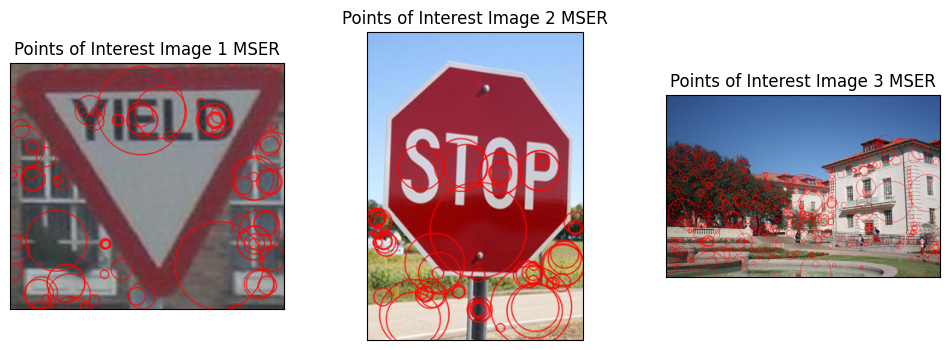

In [16]:
plt.figure(figsize=(12,4))

plt.subplot(131)
plt.title('Points of Interest Image 1 MSER')
plt.imshow(img1_rgb_MSER)
plt.xticks([]), plt.yticks([])

plt.subplot(132)
plt.title('Points of Interest Image 2 MSER')
plt.imshow(img2_rgb_MSER)
plt.xticks([]), plt.yticks([])

plt.subplot(133)
plt.title('Points of Interest Image 3 MSER')
plt.imshow(img3_rgb_MSER)
plt.xticks([]), plt.yticks([])

plt.show()

**2. [50%] Feature Descriptors**
* Perform feature acquisition (points of interest) using the SIFT detector and descriptor in image 1, 2 and 3, perform RGB visualization of all features (points of interest) found. Perform the visualization in RGB with a maximum of 100 features (points of interest) for image 1 and 2, and with a maximum of 1000 features (points of interest) for image 3. Additionally, validate the number of descriptors calculated in relation with the number of points of interest and the number of characteristics obtained in each descriptor generated by SIFT

Find all features

In [17]:
## Crear objeto SIFT

sift = cv2.SIFT_create()
sift.setContrastThreshold(0)

[keypoints1_SIFT, descriptors1_SIFT] = sift.detectAndCompute(img1_rgb, None)
[keypoints2_SIFT, descriptors2_SIFT] = sift.detectAndCompute(img2_rgb, None)
[keypoints3_SIFT, descriptors3_SIFT] = sift.detectAndCompute(img3_rgb, None)
print('Regions of Interest Image 1: ', format(len(keypoints1_SIFT)))
print('Regions of Interest Image 2: ', format(len(keypoints2_SIFT)))
print('Regions of Interest Image 3: ', format(len(keypoints3_SIFT)))

Regions of Interest Image 1:  1642
Regions of Interest Image 2:  1276
Regions of Interest Image 3:  13077


View all found features

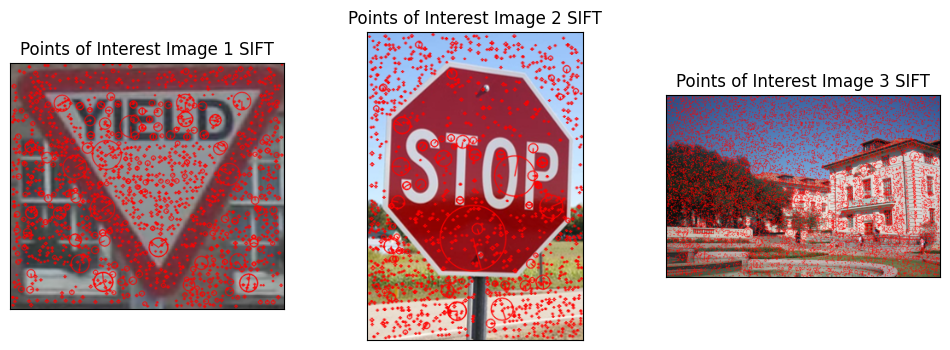

In [18]:
## Visualizar todas las regiones de interés

img1_SIFT = cv2.drawKeypoints(img1_rgb, keypoints1_SIFT, None, color=(255,0,0), flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img2_SIFT = cv2.drawKeypoints(img2_rgb, keypoints2_SIFT, None, color=(255,0,0), flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img3_SIFT = cv2.drawKeypoints(img3_rgb, keypoints3_SIFT, None, color=(255,0,0), flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(12,4))

plt.subplot(131)
plt.title('Points of Interest Image 1 SIFT')
plt.imshow(img1_SIFT)
plt.xticks([]), plt.yticks([])

plt.subplot(132)
plt.title('Points of Interest Image 2 SIFT')
plt.imshow(img2_SIFT)
plt.xticks([]), plt.yticks([])

plt.subplot(133)
plt.title('Points of Interest Image 3 SIFT')
plt.imshow(img3_SIFT)
plt.xticks([]), plt.yticks([])

plt.show()

Find threshold to take maximum of 100 features for image 1 and 2 and maximum of 1000 features for image 3

In [19]:
[keypoints1_SIFT2, descriptors1_SIFT2] = sift.detectAndCompute(img1_rgb, None)
threshold1_SIFT = 0

[keypoints2_SIFT2, descriptors2_SIFT2] = sift.detectAndCompute(img2_rgb, None)
threshold2_SIFT = 0

[keypoints3_SIFT2, descriptors3_SIFT2] = sift.detectAndCompute(img3_rgb, None)
threshold3_SIFT = 0


while len(keypoints1_SIFT2) > 100:
  threshold1_SIFT = threshold1_SIFT + 0.01
  sift.setContrastThreshold(threshold1_SIFT)
  [keypoints1_SIFT2, descriptors1_SIFT2] = sift.detectAndCompute(img1_rgb, None)

while len(keypoints2_SIFT2) > 100:
  threshold2_SIFT = threshold2_SIFT + 0.01
  sift.setContrastThreshold(threshold2_SIFT)
  [keypoints2_SIFT2, descriptors2_SIFT2] = sift.detectAndCompute(img2_rgb, None)

while len(keypoints3_SIFT2) > 1000:
  threshold3_SIFT = threshold3_SIFT + 0.01
  sift.setContrastThreshold(threshold3_SIFT)
  [keypoints3_SIFT2, descriptors3_SIFT2] = sift.detectAndCompute(img3_rgb, None)

print('Regions of Interest Image 1: ', format(len(keypoints1_SIFT2)))
print('Regions of Interest Image 2: ', format(len(keypoints2_SIFT2)))
print('Regions of Interest Image 3: ', format(len(keypoints3_SIFT2)))

Regions of Interest Image 1:  91
Regions of Interest Image 2:  94
Regions of Interest Image 3:  956


Viewing characteristics with thresholds

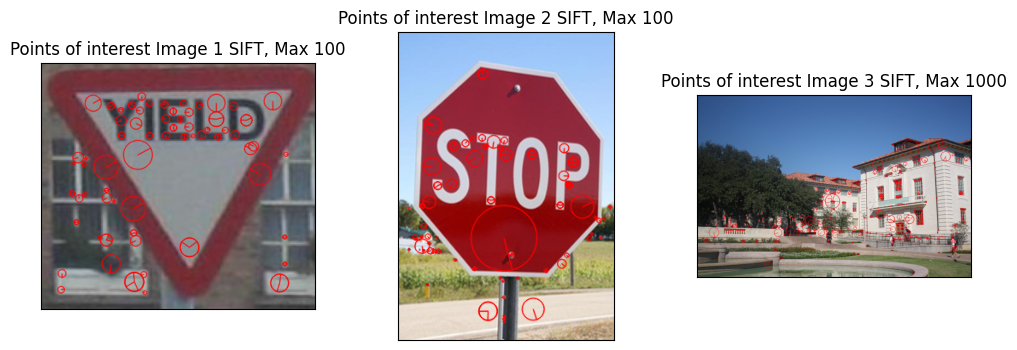

In [20]:
## Visualizar las regiones de interés

img1_SIFT2 = cv2.drawKeypoints(img1_rgb, keypoints1_SIFT2, None, color=(255,0,0), flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img2_SIFT2 = cv2.drawKeypoints(img2_rgb, keypoints2_SIFT2, None, color=(255,0,0), flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img3_SIFT2 = cv2.drawKeypoints(img3_rgb, keypoints3_SIFT2, None, color=(255,0,0), flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(12,4))

plt.subplot(131)
plt.title('Points of interest Image 1 SIFT, Max 100')
plt.imshow(img1_SIFT2)
plt.xticks([]), plt.yticks([])

plt.subplot(132)
plt.title('Points of interest Image 2 SIFT, Max 100')
plt.imshow(img2_SIFT2)
plt.xticks([]), plt.yticks([])

plt.subplot(133)
plt.title('Points of interest Image 3 SIFT, Max 1000')
plt.imshow(img3_SIFT2)
plt.xticks([]), plt.yticks([])

plt.show()

Number of descriptors calculated in relation to the number of points of interest

In [21]:
import pandas as pd
(uniq1, freq1) = (np.unique(np.array(descriptors1_SIFT,dtype=int), return_counts=True))
(uniq2, freq2) = (np.unique(descriptors2_SIFT, return_counts=True))
(uniq3, freq3) = (np.unique(descriptors3_SIFT, return_counts=True))
(uniq1_2, freq1_2) = (np.unique(descriptors1_SIFT2, return_counts=True))
(uniq2_2, freq2_2) = (np.unique(descriptors2_SIFT2, return_counts=True))
(uniq3_2, freq3_2) = (np.unique(descriptors3_SIFT2, return_counts=True))

tabla = {'Image':['Image 1','Image 2','Image 3','Imagn 1','Image 2','Image 3'],
        'Maximum features':['No limit','No limit','No limit',100,100,1000],
        'Number of features':[len(keypoints1_SIFT),len(keypoints2_SIFT),len(keypoints3_SIFT),len(keypoints1_SIFT2),len(keypoints2_SIFT2),len(keypoints3_SIFT2)],
        'Number of descriptors':[len(uniq1), len(uniq2),len(uniq3),len(uniq1_2),len(uniq2_2),len(uniq3_2)]
        }
tabla_pd = pd.DataFrame(data=tabla)
tabla_pd

Image Maximum features  Number of features  Number of descriptors
0  Image 1         No limit                1642                    243
1  Image 2         No limit                1276                    253
2  Image 3         No limit               13077                    249
3  Imagn 1              100                  91                    156
4  Image 2              100                  94                    160
5  Image 3             1000                 956                    183

* Perform feature acquisition (points of interest) using the BRISK detector and descriptor in image 1, 2 and 3, perform RGB visualization of all features (points of interest) found. Perform the visualization in RGB with a maximum of 50 features (points of interest) for image 1 and 2, and with a maximum of 1000 features (points of interest) for image 3. Additionally, validate the number of descriptors calculated in relation with the number of points of interest and the number of characteristics obtained in each descriptor generated by BRISK.

In [22]:
## Crear objeto BRISK

brisk = cv2.BRISK_create()
brisk.setThreshold(0)

[keypoints1_BRISK, descriptors1_BRISK] = brisk.detectAndCompute(img1_rgb, None)
[keypoints2_BRISK, descriptors2_BRISK] = brisk.detectAndCompute(img2_rgb, None)
[keypoints3_BRISK, descriptors3_BRISK] = brisk.detectAndCompute(img3_rgb, None)

print('Points of interest image 1: ', format(len(keypoints1_BRISK)))
print('Points of interest image 2: ', format(len(keypoints2_BRISK)))
print('Points of interest image 3: ', format(len(keypoints3_BRISK)))

Points of interest image 1:  6702
Points of interest image 2:  4343
Points of interest image 3:  46606


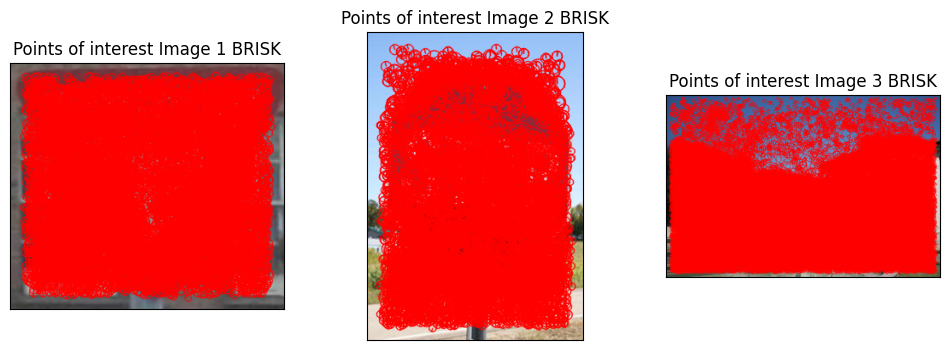

In [23]:
## Visualizar todas las regiones de interés

img1_BRISK = cv2.drawKeypoints(img1_rgb, keypoints1_BRISK, None, color=(255,0,0), flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img2_BRISK = cv2.drawKeypoints(img2_rgb, keypoints2_BRISK, None, color=(255,0,0), flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img3_BRISK = cv2.drawKeypoints(img3_rgb, keypoints3_BRISK, None, color=(255,0,0), flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(12,4))

plt.subplot(131)
plt.title('Points of interest Image 1 BRISK')
plt.imshow(img1_BRISK)
plt.xticks([]), plt.yticks([])

plt.subplot(132)
plt.title('Points of interest Image 2 BRISK')
plt.imshow(img2_BRISK)
plt.xticks([]), plt.yticks([])

plt.subplot(133)
plt.title('Points of interest Image 3 BRISK')
plt.imshow(img3_BRISK)
plt.xticks([]), plt.yticks([])

plt.show()

Encontrar umbral para tomar un máximo de 50 características para la imagen 1 y 2 y un máximo de 1000 carácterísticas para la imagen 3

In [24]:
[keypoints1_BRISK2, descriptors1_BRISK2] =brisk.detectAndCompute(img1_rgb, None)
threshold1_BRISK = 0

[keypoints2_BRISK2, descriptors2_BRISK2] =brisk.detectAndCompute(img2_rgb, None)
threshold2_BRISK = 0

[keypoints3_BRISK2, descriptors3_BRISK2] =brisk.detectAndCompute(img3_rgb, None)
threshold3_BRISK = 0


while len(keypoints1_BRISK2) > 50:
  threshold1_BRISK = threshold1_BRISK + 1
  brisk.setThreshold(threshold1_BRISK)
  [keypoints1_BRISK2, descriptors1_BRISK2] =brisk.detectAndCompute(img1_rgb, None)

while len(keypoints2_BRISK2) > 50:
  threshold2_BRISK = threshold2_BRISK + 1
  brisk.setThreshold(threshold2_BRISK)
  [keypoints2_BRISK2, descriptors2_BRISK2] =brisk.detectAndCompute(img2_rgb, None)

while len(keypoints3_BRISK2) > 1000:
  threshold3_BRISK = threshold3_BRISK + 1
  brisk.setThreshold(threshold3_BRISK)
  [keypoints3_BRISK2, descriptors3_BRISK2] =brisk.detectAndCompute(img3_rgb, None)

print('Points of interest Image 1: ', format(len(keypoints1_BRISK2)))
print('Points of interest Image 2: ', format(len(keypoints2_BRISK2)))
print('Points of interest Image 3: ', format(len(keypoints3_BRISK2)))

Points of interest Image 1:  48
Points of interest Image 2:  48
Points of interest Image 3:  984


Visualización de las características con los umbrales

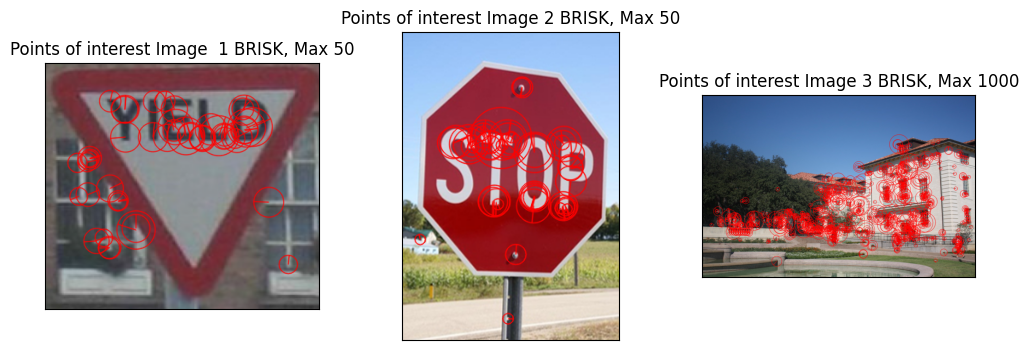

In [25]:
## Visualizar las regiones de interés

img1_BRISK2 = cv2.drawKeypoints(img1_rgb, keypoints1_BRISK2, None, color=(255,0,0), flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img2_BRISK2 = cv2.drawKeypoints(img2_rgb, keypoints2_BRISK2, None, color=(255,0,0), flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img3_BRISK2 = cv2.drawKeypoints(img3_rgb, keypoints3_BRISK2, None, color=(255,0,0), flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(12,4))

plt.subplot(131)
plt.title('Points of interest Image  1 BRISK, Max 50')
plt.imshow(img1_BRISK2)
plt.xticks([]), plt.yticks([])

plt.subplot(132)
plt.title('Points of interest Image 2 BRISK, Max 50')
plt.imshow(img2_BRISK2)
plt.xticks([]), plt.yticks([])

plt.subplot(133)
plt.title('Points of interest Image 3 BRISK, Max 1000')
plt.imshow(img3_BRISK2)
plt.xticks([]), plt.yticks([])

plt.show()

In [26]:
(uniq1, freq1) = (np.unique(descriptors1_BRISK, return_counts=True))
(uniq2, freq2) = (np.unique(descriptors2_BRISK, return_counts=True))
(uniq3, freq3) = (np.unique(descriptors3_BRISK, return_counts=True))
(uniq1_2, freq1_2) = (np.unique(descriptors1_BRISK2, return_counts=True))
(uniq2_2, freq2_2) = (np.unique(descriptors2_BRISK2, return_counts=True))
(uniq3_2, freq3_2) = (np.unique(descriptors3_BRISK2, return_counts=True))

tabla = {'Image':['Image 1','Image 2','Image 3','Image 1','Image 2','Image 3'],
        'Maximum features':['No limit','No limit','No limit',100,100,300],
        'Number of features':[len(keypoints1_BRISK),len(keypoints2_BRISK),len(keypoints3_BRISK),len(keypoints1_BRISK2),len(keypoints2_BRISK2),len(keypoints3_BRISK2)],
        'Number of descriptors':[len(uniq1), len(uniq2),len(uniq3),len(uniq1_2),len(uniq2_2),len(uniq3_2)]
        }
tabla_pd = pd.DataFrame(data=tabla)
tabla_pd

Image Maximum features  Number of features  Number of descriptors
0  Image 1         No limit                6702                    256
1  Image 2         No limit                4343                    256
2  Image 3         No limit               46606                    256
3  Image 1              100                  48                    241
4  Image 2              100                  48                    236
5  Image 3              300                 984                    256

* Perform feature acquisition (points of interest) using the ORB detector and descriptor in image 1, 2 and 3, perform RGB visualization of all features (points of interest) found. Perform the visualization in RGB with a maximum of 100 features (points of interest) for image 1 and 2, and with a maximum of 300 features (points of interest) for image 3. Additionally, validate the number of descriptors calculated in relation with the number of points of interest and the number of characteristics obtained in each descriptor generated by ORB.

In [27]:
## Crear objeto ORB

orb = cv2.ORB_create()
orb.setFastThreshold(0)

[keypoints1_ORB, descriptors1_ORB] = orb.detectAndCompute(img1_rgb, None)
[keypoints2_ORB, descriptors2_ORB] = orb.detectAndCompute(img2_rgb, None)
[keypoints3_ORB, descriptors3_ORB] = orb.detectAndCompute(img3_rgb, None)

print('Points of interest Image 1: ', format(len(keypoints1_ORB)))
print('Points of interest Image 2: ', format(len(keypoints2_ORB)))
print('Points of interest Image 3: ', format(len(keypoints3_ORB)))

Points of interest Image 1:  497
Points of interest Image 2:  466
Points of interest Image 3:  500


View all features

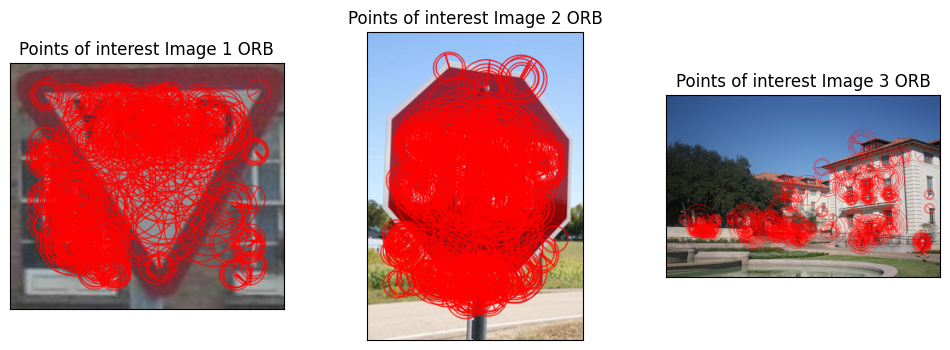

In [28]:
## Visualizar todas las regiones de interés

img1_ORB = cv2.drawKeypoints(img1_rgb, keypoints1_ORB, None, color=(255,0,0), flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img2_ORB = cv2.drawKeypoints(img2_rgb, keypoints2_ORB, None, color=(255,0,0), flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img3_ORB = cv2.drawKeypoints(img3_rgb, keypoints3_ORB, None, color=(255,0,0), flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(12,4))

plt.subplot(131)
plt.title('Points of interest Image 1 ORB')
plt.imshow(img1_ORB)
plt.xticks([]), plt.yticks([])

plt.subplot(132)
plt.title('Points of interest Image 2 ORB')
plt.imshow(img2_ORB)
plt.xticks([]), plt.yticks([])

plt.subplot(133)
plt.title('Points of interest Image 3 ORB')
plt.imshow(img3_ORB)
plt.xticks([]), plt.yticks([])

plt.show()

Find threshold to take a maximum of 100 features for image 1 and 2 and a maximum of 300 features for image 3

In [29]:
[keypoints1_orb2, descriptors1_orb2] =orb.detectAndCompute(img1_rgb, None)
threshold1_orb = 0

[keypoints2_orb2, descriptors2_orb2] =orb.detectAndCompute(img2_rgb, None)
threshold2_orb = 0

[keypoints3_orb2, descriptors3_orb2] =orb.detectAndCompute(img3_rgb, None)
threshold3_orb = 0


while len(keypoints1_orb2) > 100:
  threshold1_orb = threshold1_orb + 1
  orb.setFastThreshold(threshold1_orb)
  [keypoints1_orb2, descriptors1_orb2] =orb.detectAndCompute(img1_rgb, None)

while len(keypoints2_orb2) > 100:
  threshold2_orb = threshold2_orb + 1
  orb.setFastThreshold(threshold2_orb)
  [keypoints2_orb2, descriptors2_orb2] =orb.detectAndCompute(img2_rgb, None)

while len(keypoints3_orb2) > 300:
  threshold3_orb = threshold3_orb + 1
  orb.setFastThreshold(threshold3_orb)
  [keypoints3_orb2, descriptors3_orb2] =orb.detectAndCompute(img3_rgb, None)

print('Points of interest Image 1: ', format(len(keypoints1_orb2)))
print('Points of interest Image 2: ', format(len(keypoints2_orb2)))
print('Points of interest Image 3: ', format(len(keypoints3_orb2)))

Points of interest Image 1:  100
Points of interest Image 2:  98
Points of interest Image 3:  298


View features with maximum values

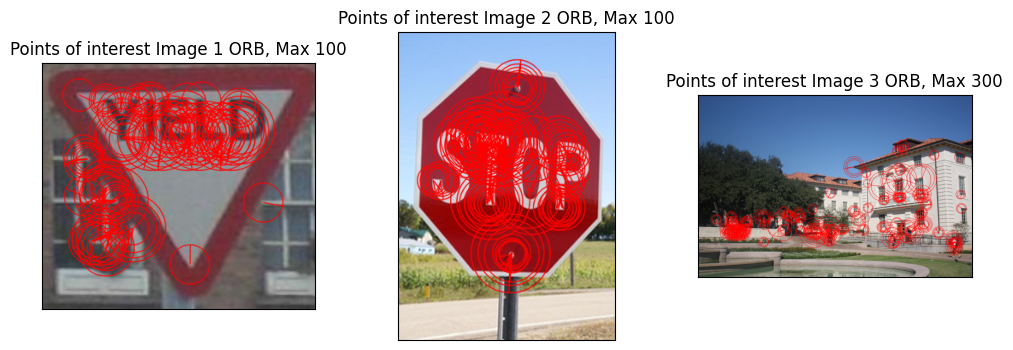

In [30]:
## Visualizar las regiones de interés

img1_ORB2 = cv2.drawKeypoints(img1_rgb, keypoints1_orb2, None, color=(255,0,0), flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img2_ORB2 = cv2.drawKeypoints(img2_rgb, keypoints2_orb2, None, color=(255,0,0), flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img3_ORB2 = cv2.drawKeypoints(img3_rgb, keypoints3_orb2, None, color=(255,0,0), flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(12,4))

plt.subplot(131)
plt.title('Points of interest Image 1 ORB, Max 100')
plt.imshow(img1_ORB2)
plt.xticks([]), plt.yticks([])

plt.subplot(132)
plt.title('Points of interest Image 2 ORB, Max 100')
plt.imshow(img2_ORB2)
plt.xticks([]), plt.yticks([])

plt.subplot(133)
plt.title('Points of interest Image 3 ORB, Max 300')
plt.imshow(img3_ORB2)
plt.xticks([]), plt.yticks([])

plt.show()

In [32]:
(uniq1, freq1) = (np.unique(descriptors1_ORB, return_counts=True))
(uniq2, freq2) = (np.unique(descriptors2_ORB, return_counts=True))
(uniq3, freq3) = (np.unique(descriptors3_ORB, return_counts=True))
(uniq1_2, freq1_2) = (np.unique(descriptors1_orb2, return_counts=True))
(uniq2_2, freq2_2) = (np.unique(descriptors2_orb2, return_counts=True))
(uniq3_2, freq3_2) = (np.unique(descriptors3_orb2, return_counts=True))

tabla = {'Image':['Image 1','Image 2','Image 3','Image 1','Image 2','Image 3'],
        'Maximum features':['No limit','No limit','No limit',100,100,300],
        'Maximum features':[len(keypoints1_ORB),len(keypoints2_ORB),len(keypoints3_ORB),len(keypoints1_orb2),len(keypoints2_orb2),len(keypoints3_orb2)],
        'Maximum features':[len(uniq1), len(uniq2),len(uniq3),len(uniq1_2),len(uniq2_2),len(uniq3_2)]
        }
tabla_pd = pd.DataFrame(data=tabla)
tabla_pd

Image  Maximum features
0  Image 1               256
1  Image 2               256
2  Image 3               256
3  Image 1               256
4  Image 2               256
5  Image 3               256

**Conclusions and comments**

Feature detectors detect the corners or edge ends of images based on the difference in intensity of their pixels. Edge detectors assign each pixel a score with a function relative to its neighboring pixels.

The Harris edge detector is a grayscale image with these scores. Basically it finds the difference in intensity for a displacement. Thresholding for a proper score gives you the corners of the image.

The Shi-Tomasi edge detector makes a modification to the Harris formula, obtaining more precise corners and better results as can be seen in the implementation.

The FAST algorithm "High Speed Machine Learning for Corner Detection" is a 16-step algorithm optimized for corner detection. It obtains good results compared to the previous two algorithms.

Feature detectors are responsible for finding features that are rotation invariant, as noted above. Feature descriptors are responsible for obtaining regions instead of points of interest, in such a way that they are also invariant to scale change, and any type of geometric transformation.

The SIFT algorithm receives a threshold and based on that threshold it finds a number of features that also determines the radius of the regions. The BRISK algorithm acts in a similar way but with a normalized threshold.

ORB is basically a fusion of the FAST keypoint detector and the BRIEF descriptor with many modifications to improve performance. First use FAST to find key points, then apply the Harris corner measure to find the top N points between them using the BRIEF threshold.










